<a href="https://colab.research.google.com/github/yeonshiri/AGS/blob/main/code/short_answer_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# yolov5 불러와서 실행하기
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 17485 (delta 76), reused 29 (delta 29), pack-reused 17380 (from 4)
Receiving objects: 100% (17485/17485), 16.35 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (11987/11987), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s

In [2]:
from google.colab import files
uploaded = files.upload()
!unzip dataset.zip

Saving dataset.zip to dataset.zip
Archive:  dataset.zip
  inflating: images/train/image_shortanswer_0_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_0_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_10_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_11_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_11_roi2_class1.jpg  
  inflating: images/train/image_shortanswer_12_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_12_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_13_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_13_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_14_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_14_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_15_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_16_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_16_roi1_class1.jpg  
  inflating: images/train/image_shor

In [9]:
!ls   # 이걸로 data.yaml,images, labels 있는지 확인

benchmarks.py	 dataset.zip  images	   pyproject.toml    segment
CITATION.cff	 data.yaml    labels	   README.md	     train.py
classify	 detect.py    LICENSE	   README.zh-CN.md   tutorial.ipynb
CONTRIBUTING.md  export.py    models	   requirements.txt  utils
data		 hubconf.py   __pycache__  runs		     val.py


In [4]:
!ls images

train  valid


In [5]:
!mv data.yaml.txt data.yaml

In [6]:
# class를 0으로 일괄되게 바꿔주는 코드

import os

def force_convert_class2_to_class0(label_dir):
    for file_name in os.listdir(label_dir):
        if file_name.endswith(".txt"):
            path = os.path.join(label_dir, file_name)
            with open(path, "r") as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    parts[0] = "0"  # class 번호를 무조건 0으로
                    new_lines.append(" ".join(parts) + "\n")

            with open(path, "w") as f:
                f.writelines(new_lines)

# 적용
force_convert_class2_to_class0("labels/train")
force_convert_class2_to_class0("labels/valid")


In [10]:
%%writefile data.yaml
train: ../images/train
val: ../images/valid

nc: 1
names: ['answer_box']

Overwriting data.yaml


In [11]:
!cat data.yaml

train: ../images/train
val: ../images/valid

nc: 1
names: ['answer_box']


In [12]:
# yolov5 모델들 train 실행하는 코드. yolov8은 방식이 다름을 주의

!python train.py --img 960 --batch 8 --epochs 100 \
--data data.yaml \
--cfg models/yolov5n.yaml \
--weights yolov5n.pt \
--name number_detector

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       5/99      2.57G    0.06151    0.02345          0         14        960:  92% 22/24 [00:06<00:00,  3.28it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/99      2.57G    0.06177    0.02352          0         17        960:  96% 23/24 [00:06<00:00,  3.02it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/99      2.57G     0.0625    0.02361          0         15        960: 100% 24/24 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:00<00:00,  3.12it/s]
                   all         21         21      0.187      0.619      0.294      0.124

      Epoch    GPU_mem   bo

In [13]:
import os

val_dir = 'images/valid'
val_imgs = os.listdir(val_dir)
print(val_imgs[:10])  # 앞 10개만 보기

['image_shortanswer_54_roi1_class1.jpg', 'image_shortanswer_73_roi1_class1.jpg', 'image_shortanswer_18_roi1_class1.jpg', 'image_shortanswer_83_roi0_class1.jpg', 'image_shortanswer_8_roi1_class1.jpg', 'image_shortanswer_15_roi0_class1.jpg', 'image_shortanswer_58_roi0_class1.jpg', 'image_shortanswer_11_roi1_class1.jpg', 'image_shortanswer_92_roi2_class1.jpg', 'image_shortanswer_27_roi1_class1.jpg']


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-18 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 942x698 1 answer_box
Speed: 7.9ms pre-process, 9.1ms inference, 1.9ms NMS per image at shape (1, 3, 640, 480)


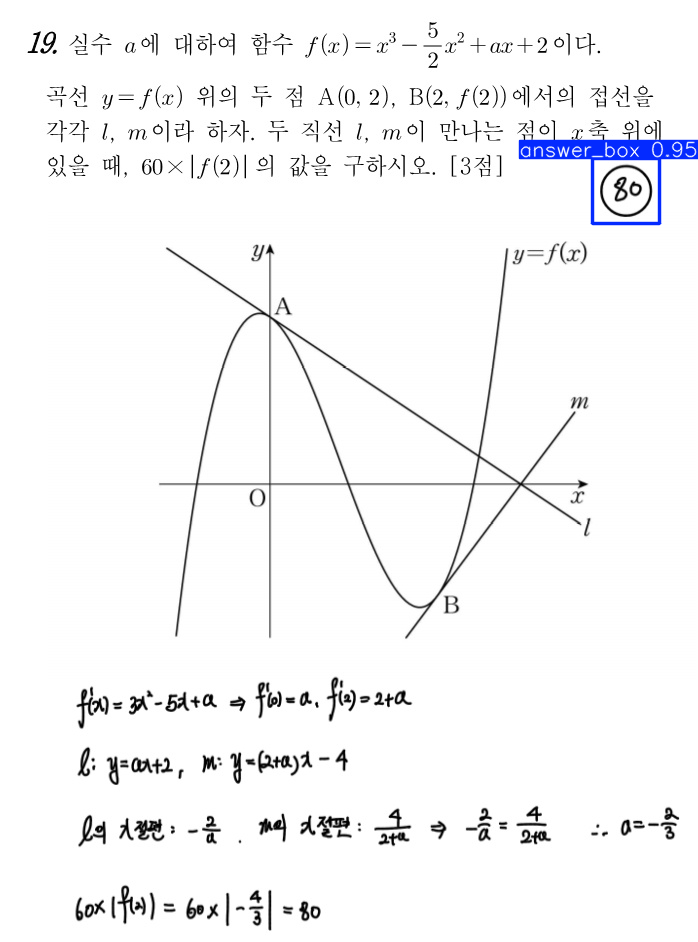

In [50]:
# from google.colab import files
# uploaded = files.upload()

import torch
import os
import glob

# runs/detect 하위의 exp* 폴더 모두 찾기
folders = glob.glob('/content/yolov5/runs/train/number_detector*')
latest_folder = max(folders, key=os.path.getmtime)

model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path=f'{latest_folder}/weights/best.pt')


# 예시 이미지 파일명으로 수정
val_dir = 'images/valid'
val_imgs = os.listdir(val_dir)
img_path = f'{val_dir}/{val_imgs[8]}'

# 추론
results = model(img_path)
results.print()     # 예측된 class, confidence 출력
results.show()      # bounding box 그려진 이미지 출력

In [ ]:
# ------------------------------------------------------------------------------------------------
# 이미 사전학습된 weight best.pt file 이용해서 바로 inference하기

from google.colab import files
uploaded = files.upload()  # 사전학습 weight인 best.pt file upload
print("📦 best.pt 업로드")

Saving best.pt to best.pt


In [ ]:
# 잘 upload 되었는지 확인하기

import os
print(os.listdir('/content'))

['.config', 'roi_outputs', 'image_val_72.jpg', 'yolov5', 'best.pt', 'sample_data']


In [ ]:
from google.colab import files
import shutil
uploaded = files.upload()  # 추론할 이미지 upload
image_filename = list(uploaded.keys())[0]  # 업로드된 첫 번째 이미지 이름
if not os.path.exists(f'/content/{image_filename}'):
    shutil.move(image_filename, f'/content/{image_filename}')

image_path = f'/content/{image_filename}'
image_basename = os.path.splitext(image_filename)[0]  # 확장자 제거 → myimage
print("추론할 이미지 업로드")

Saving image_val_83.jpg to image_val_83.jpg
🖼️ 추론할 이미지 업로드


In [ ]:
# bounding box 추론하기

!python detect.py --weights /content/best.pt --img 1280 --conf 0.25 --source $image_path --save-txt --save-conf

detect: weights=['/content/best.pt'], source=/content/image_val_83.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/1 /content/image_val_83.jpg: 1280x928 2 0s, 28.3ms
Speed: 1.5ms pre-process, 28.3ms inference, 124.6ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp2
1 labels saved to runs/detect/exp2/labels


In [58]:
# # yolo로 추론된 bounding box의 image file, 좌표 txt file을 이용해서 ROI 추출하기
# import cv2
# import os
# import glob

# # runs/detect 하위의 exp* 폴더 모두 찾기
# exp_folders = glob.glob('/content/yolov5/runs/detect/exp*')
# latest_exp = max(exp_folders, key=os.path.getmtime)

# # 이미지와 라벨 경로 설정
# label_path = os.path.join(latest_exp, 'labels', f'{image_basename}.txt')
# output_dir = '/content/roi_outputs'
# os.makedirs(output_dir, exist_ok=True)    # 이미 있으면 이 코드 주석 처리

# # 원본 이미지 불러오기
# image = cv2.imread(image_path)
# h, w = image.shape[:2]

# # 라벨 파일 읽기 (YOLO format: class_id x_center y_center width height)
# with open(label_path, 'r') as f:
#     lines = f.readlines()

# for i, line in enumerate(lines):
#     parts = line.strip().split()
#     x_center, y_center, width, height = map(float, parts[1:5])  # class, conf 제외

#     # YOLO 좌표 -> 이미지 좌표로 변환
#     x1 = int((x_center - width / 2) * w)
#     y1 = int((y_center - height / 2) * h)
#     x2 = int((x_center + width / 2) * w)
#     y2 = int((y_center + height / 2) * h)

#     # ROI 추출
#     roi = image[y1:y2, x1:x2]

#     # ROI 저장
#     roi_filename = f'roi_{i}.jpg'
#     roi_path = os.path.join(output_dir, roi_filename)
#     cv2.imwrite(roi_path, roi)

# print(f"✅ ROI 저장 완료! 총 {len(lines)}개 생성됨.")

#------------------------------------------------------------------------
import cv2
import os
import glob

# 최신 detect 결과 폴더 찾기
exp_folders = glob.glob('/content/yolov5/runs/train/number_detector*')
latest_exp = max(exp_folders, key=os.path.getmtime)

label_dir = os.path.join(latest_exp, 'labels')
image_dir = latest_exp
output_dir = '/content/roi_from_inference'
os.makedirs(output_dir, exist_ok=True)

label_files = glob.glob(os.path.join(label_dir, '*.txt'))
saved = 0

for label_file in label_files:
    base_name = os.path.splitext(os.path.basename(label_file))[0]
    image_path = os.path.join(image_dir, base_name + '.jpg')  # 또는 .png
    if not os.path.exists(image_path):
        print(f"❌ 이미지 없음: {image_path}")
        continue

    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ 이미지 로드 실패: {image_path}")
        continue

    h, w = image.shape[:2]

    with open(label_file, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) < 5:
            continue
        _, x_center, y_center, width, height = map(float, parts)

        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        roi = image[y1:y2, x1:x2]
        if roi.size == 0:
            print(f"⚠️ 빈 ROI: {x1, y1, x2, y2} in {base_name}")
            continue

        roi_filename = f'{base_name}_roi{i}.jpg'
        cv2.imwrite(os.path.join(output_dir, roi_filename), roi)
        saved += 1

print(f"✅ ROI 추출 완료! 총 {saved}개 저장됨.")



✅ ROI 추출 완료! 총 0개 저장됨.


In [ ]:
#-----------------------------------------------------------------------
# yolov8 사용하는 코드

# ✅ 1. YOLOv8 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# ✅ 2. 파일 업로드 및 데이터 준비
from google.colab import files
uploaded = files.upload()  # dataset.zip
!unzip dataset.zip

Saving dataset.zip to dataset.zip
Archive:  dataset.zip
  inflating: images/train/image_0.jpg  
  inflating: images/train/image_1.jpg  
  inflating: images/train/image_10.jpg  
  inflating: images/train/image_100.jpg  
  inflating: images/train/image_101.jpg  
  inflating: images/train/image_102.jpg  
  inflating: images/train/image_103.jpg  
  inflating: images/train/image_104.jpg  
  inflating: images/train/image_105.jpg  
  inflating: images/train/image_106.jpg  
  inflating: images/train/image_107.jpg  
  inflating: images/train/image_108.jpg  
  inflating: images/train/image_109.jpg  
  inflating: images/train/image_11.jpg  
  inflating: images/train/image_110.jpg  
  inflating: images/train/image_111.jpg  
  inflating: images/train/image_112.jpg  
  inflating: images/train/image_113.jpg  
  inflating: images/train/image_114.jpg  
  inflating: images/train/image_115.jpg  
  inflating: images/train/image_116.jpg  
  inflating: images/train/image_117.jpg  
  inflating: images/train/

In [ ]:
!mv data.yaml.txt data.yaml  # 라벨 파일명 수정

In [ ]:
# ✅ 3. YOLOv8 모델 불러와서 학습
from ultralytics import YOLO

model = YOLO('yolov8m.pt')  # 사전학습된 yolov8m 불러오기

# 학습 실행
model.train(
    data='data.yaml',    # 클래스 및 경로 설정 파일
    imgsz=1024,          # 이미지 해상도
    epochs=50,
    batch=8,
    name='number_detector_v8'  # 실험 이름 (runs/detect 밑에 생성됨)
)

100%|██████████| 49.7M/49.7M [00:00<00:00, 304MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=number_detector_v83, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

train: Scanning /content/labels/train.cache... 738 images, 0 backgrounds, 0 corrupt: 100%|██████████| 738/738 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 529.2±76.3 MB/s, size: 77.3 KB)


val: Scanning /content/labels/val.cache... 114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]


Plotting labels to runs/detect/number_detector_v83/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/number_detector_v83
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.97G      1.869      2.638      1.804         15       1024: 100%|██████████| 93/93 [01:00<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]

                   all        114        284     0.0459      0.165     0.0231    0.00463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.07G      1.741      2.307      1.727          4       1024: 100%|██████████| 93/93 [00:59<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]

                   all        114        284     0.0907      0.461     0.0707     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.09G       1.72      2.225      1.708          6       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all        114        284      0.022     0.0141    0.00826    0.00288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.99G      1.656      2.181      1.697          6       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]

                   all        114        284      0.194      0.662      0.279     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.99G      1.586      2.106      1.645         10       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        114        284      0.176      0.458      0.218     0.0711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.02G      1.545      2.093      1.614         15       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]

                   all        114        284       0.51      0.574      0.457      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.04G      1.522      2.074      1.606          4       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]

                   all        114        284      0.324      0.637      0.383      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.98G      1.495      2.088      1.589         12       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]

                   all        114        284       0.16      0.391      0.151     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.06G       1.46       2.07      1.586          5       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        114        284       0.61      0.489       0.46      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.01G      1.455      2.047      1.532         13       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]

                   all        114        284      0.285      0.468      0.287      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         8G       1.46      2.069      1.574          5       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        114        284       0.55      0.525      0.477       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.07G      1.431       2.04      1.553          6       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        114        284      0.329       0.38      0.292      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.98G      1.423      2.054      1.549          7       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]

                   all        114        284      0.645      0.535      0.489      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       7.9G      1.436      2.042      1.562         17       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]

                   all        114        284      0.571      0.504      0.467      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.04G      1.425      2.051      1.544          6       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]

                   all        114        284      0.628      0.535      0.484      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.11G      1.404      2.018      1.517         11       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]

                   all        114        284      0.522      0.525      0.453      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.06G       1.41      2.034      1.525         12       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        114        284      0.542      0.549      0.514      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.08G      1.411      2.025      1.516          8       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        114        284      0.419       0.57      0.473       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         8G      1.391      2.003      1.508          7       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        114        284      0.605      0.542      0.511      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.97G      1.378      2.021      1.489         20       1024: 100%|██████████| 93/93 [00:58<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]

                   all        114        284      0.656      0.535      0.472      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.09G       1.39      1.984      1.525          5       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]

                   all        114        284      0.669      0.546      0.491      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.04G      1.402      2.023      1.533          7       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        114        284       0.37      0.585      0.456      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.99G      1.354      1.991      1.491         11       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]

                   all        114        284      0.371      0.623      0.456      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.07G      1.372      1.982      1.492          4       1024: 100%|██████████| 93/93 [00:58<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        114        284      0.382      0.613      0.492       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         8G      1.364      1.992      1.499         10       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]

                   all        114        284      0.597      0.542      0.485      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.99G      1.366      1.962      1.503         14       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]

                   all        114        284      0.654      0.528       0.51      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.03G       1.37      1.978      1.487          7       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]

                   all        114        284      0.637      0.511       0.47      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.05G      1.346      1.961       1.48          9       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all        114        284      0.635      0.542      0.499      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.04G      1.336      1.953      1.481         10       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        114        284      0.632      0.511      0.521      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.06G      1.334       1.96      1.472          6       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        114        284      0.344      0.585      0.456      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.02G      1.327      1.934      1.471          7       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        114        284      0.573      0.542      0.489       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.08G      1.355      1.977      1.482         11       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        114        284      0.671      0.539      0.511      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.99G      1.313      1.934      1.452          5       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        114        284      0.474      0.574      0.529      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.96G      1.328      1.955      1.466         11       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]

                   all        114        284      0.517      0.521      0.512      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.01G      1.323      1.954      1.459         10       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        114        284      0.433       0.57      0.518      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.06G      1.319      1.936      1.461          6       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        114        284       0.58      0.567      0.563      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.99G      1.347      1.976      1.485         11       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        114        284      0.458      0.546      0.458      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.02G      1.308      1.963      1.467         14       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]

                   all        114        284      0.568      0.451      0.479      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.05G      1.291      1.882       1.44         13       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]

                   all        114        284      0.663      0.546      0.556       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.09G      1.298      1.956      1.451          5       1024: 100%|██████████| 93/93 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all        114        284      0.602      0.542      0.519      0.257


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.96G      1.284      1.969      1.481          5       1024: 100%|██████████| 93/93 [00:58<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]

                   all        114        284      0.583      0.528      0.482      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.96G      1.294      1.953      1.487          5       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all        114        284      0.542       0.56      0.491       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.03G      1.268      1.928      1.459          4       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]

                   all        114        284      0.454       0.57      0.479      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.02G      1.282      1.935      1.485          6       1024: 100%|██████████| 93/93 [00:57<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        114        284      0.538      0.539      0.462      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.96G      1.277      1.931      1.468          4       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        114        284      0.508      0.546      0.474      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.02G      1.277      1.913      1.456          4       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]

                   all        114        284       0.53      0.528      0.455      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.96G      1.268      1.907       1.46          4       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        114        284      0.532      0.539      0.472      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.96G      1.268      1.916      1.457          6       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        114        284       0.52      0.527      0.473      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.96G       1.27      1.904      1.448          4       1024: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        114        284      0.518      0.521       0.48      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.96G      1.259      1.903      1.457          7       1024: 100%|██████████| 93/93 [00:57<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        114        284      0.564       0.52      0.473      0.251



50 epochs completed in 0.918 hours.
Optimizer stripped from runs/detect/number_detector_v83/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/number_detector_v83/weights/best.pt, 52.1MB

Validating runs/detect/number_detector_v83/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


                   all        114        284      0.663      0.546      0.555       0.26
Speed: 0.8ms preprocess, 17.0ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to runs/detect/number_detector_v83


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d6d39f7ca10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

best.pt 자동 경로 발견됨: /content/runs/detect/number_detector_v83/weights/best.pt

image 1/1 /content/images/val/image_val_1.jpg: 1024x736 5 Problems, 60.2ms
Speed: 5.3ms preprocess, 60.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 736)
ROI 저장 완료: 총 5개


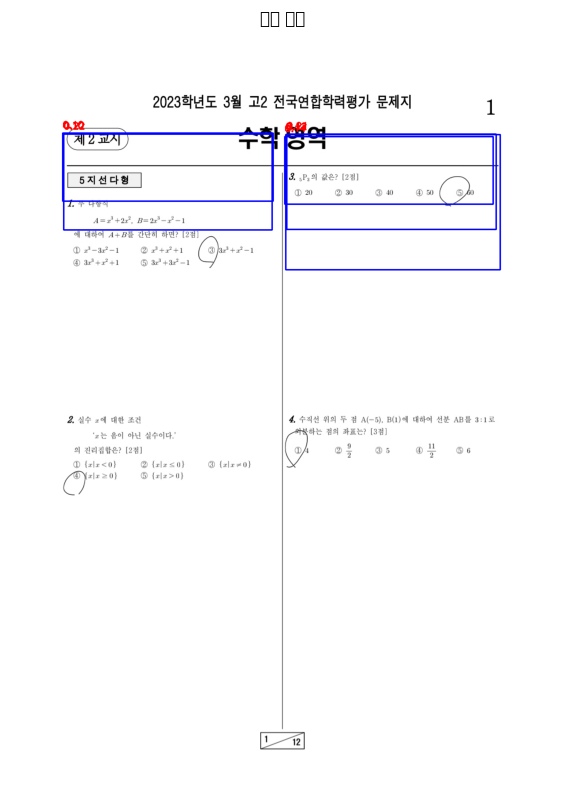

In [ ]:
from ultralytics import YOLO
import cv2
import os
import glob
from google.colab import files
import matplotlib.pyplot as plt

# 1. 자동 경로 탐색
folders = glob.glob('/content/runs/detect/number_detector_v8*')
latest_best = None

if folders:
    latest_folder = max(folders, key=os.path.getmtime)
    best_path = os.path.join(latest_folder, 'weights', 'best.pt')

    if os.path.exists(best_path):
        print(f"best.pt 자동 경로 발견됨: {best_path}")
        model_path = best_path
    else:
        print("❌ best.pt 파일이 자동 경로에 없습니다. 업로드로 대체합니다.")
        latest_folder = None
else:
    print("❌ number_detector_v8 경로 없음. 업로드로 대체합니다.")

# 2. 업로드 대체 루트
if not folders or not os.path.exists(best_path):
    uploaded = files.upload()
    uploaded_filename = list(uploaded.keys())[0]
    model_path = f"/content/{uploaded_filename}"

# 3. 모델 로딩
model = YOLO(model_path)

# 이미지 선택
val_dir = '/content/images/val'
val_imgs = sorted(os.listdir(val_dir))
img_path = os.path.join(val_dir, val_imgs[1])  # 6번째 이미지 선택

# 추론 실행
results = model.predict(img_path, imgsz=1024, save=False, conf=0.1)
image = cv2.imread(img_path)
h, w = results[0].orig_shape[:2]

# 결과 경로 생성
output_dir = '/content/roi_outputs'
os.makedirs(output_dir, exist_ok=True)

# 박스 좌표 추출 및 저장
boxes = results[0].boxes.xyxy.cpu().numpy()  # (x1, y1, x2, y2)
confs = results[0].boxes.conf.cpu().numpy()

for i, (box, conf) in enumerate(zip(boxes, confs)):
    x1, y1, x2, y2 = map(int, box)

    if x1 < 0 or y1 < 0 or x2 > w or y2 > h:
        print(f"❌ 잘못된 ROI: x1={x1}, y1={y1}, x2={x2}, y2={y2}")
        continue

    roi = image[y1:y2, x1:x2]
    roi_filename = f'roi_{i}.jpg'
    cv2.imwrite(os.path.join(output_dir, roi_filename), roi)

print(f"ROI 저장 완료: 총 {len(boxes)}개")

# 시각화용 박스 그리기
image_drawn = image.copy()
for box, conf in zip(boxes, confs):
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(image_drawn, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(image_drawn, f'{conf:.2f}', (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# 결과 출력
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_drawn, cv2.COLOR_BGR2RGB))
plt.title("추론 결과")
plt.axis('off')
plt.show()


In [ ]:
# 디렉토리 내부 data 삭제하는 코드

import os
import glob

output_dir = '/content/roi_outputs'

# 디렉토리 내 모든 파일 삭제
files = glob.glob(os.path.join(output_dir, '*'))
for f in files:
    os.remove(f)

print(f"✅ {output_dir} 내부 파일 {len(files)}개 삭제 완료!")

✅ /content/roi_outputs 내부 파일 4개 삭제 완료!


In [59]:
# --------------------------------------------------------------
# PaddleOcr

!pip install paddlepaddle
!pip install paddleocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=9179ad69378fdc18dc50c02068fd702eafb25065a63db406853506e63018852c
  Stored 

In [68]:
import os
import cv2
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt

# 1. 경로 설정
image_path = "/content/yolov5/images/valid/image_shortanswer_73_roi1_class1.jpg"
label_path = "/content/yolov5/labels/valid/image_shortanswer_73_roi1_class1.txt"

# 2. 이미지 읽기
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"이미지 로드 실패: {image_path}")
h, w = image.shape[:2]

# 3. OCR 초기화
ocr = PaddleOCR(use_angle_cls=False, lang='en')

# 4. 라벨 파일 읽고 ROI 추출 + OCR 수행
with open(label_path, 'r') as f:
    lines = f.readlines()

for idx, line in enumerate(lines):
    parts = line.strip().split()
    if len(parts) < 5:
        print(f"라벨 오류: {line.strip()}")
        continue

    # YOLO 좌표 → 픽셀 좌표
    _, x_center, y_center, box_w, box_h = map(float, parts)
    x1 = int((x_center - box_w / 2) * w)
    y1 = int((y_center - box_h / 2) * h)
    x2 = int((x_center + box_w / 2) * w)
    y2 = int((y_center + box_h / 2) * h)

    roi = image[y1:y2, x1:x2]
    if roi.size == 0:
        print(f"빈 ROI 스킵: {x1,y1,x2,y2}")
        continue

    # OCR 수행
    result = ocr.ocr(roi, cls=False)

    # 결과 출력
    print(f"\n ROI #{idx} 위치: {x1, y1, x2, y2}")
    for line in result:
        for box in line:
            text = box[1][0]
            conf = box[1][1]
            print(f"   인식: '{text}' (정확도: {conf:.2f})")

    # 시각화 (선택)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title(f"ROI #{idx}: '{text}'")
    plt.axis('off')
    plt.show()


[2025/05/18 02:39:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l